# Section 5: Machine Learning #

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [40]:
import pandas as pd #read data into a pandas dataframe for futher analysis of data

directory = r'C:\Users\Yusuf\Documents\Govtech'
df = pd.read_csv (directory+'\car.data',thousands=',', header=None,names=["buying", "maint", "doors", "persons","lug_boot","safety","class"])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [41]:
df.shape #check no of columns and rows we are dealing with

(1728, 7)

In [42]:
df.info() #non-null objects suggests data is clean, will not be dealing with NA or null values in EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [43]:
df.describe() # frequency of class = 'unacc' is very high at 1210/1728. 
#This might suggest data is skewed towards class being unacc, maybe biased

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,small,high,unacc
freq,432,432,432,576,576,576,1210


In [44]:
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [45]:
X

,maint,doors,persons,lug_boot,safety,class
0,3,0,0,2,1,2
1,3,0,0,2,2,2
2,3,0,0,2,0,2
3,3,0,0,1,1,2
4,3,0,0,1,2,2
5,3,0,0,1,0,2
6,3,0,0,0,1,2
7,3,0,0,0,2,2
8,3,0,0,0,0,2
9,3,0,1,2,1,2


In [46]:
y.value_counts()

3    432
2    432
1    432
0    432
Name: buying, dtype: int64

In [47]:
df.apply(lambda x: sum(x.isnull()),axis=0)

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

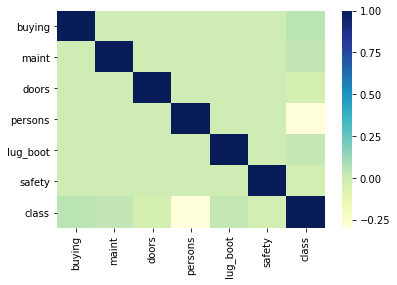

In [48]:
sns.heatmap(df.corr(),cmap="YlGnBu")

From the heatmap we can see that there is a weak linear relationship between each variable. This would suggest that a linear regression model will not be suitable for the data that we are dealing with

In [49]:
df = df.values
np.random.shuffle(df)

In [50]:
split = int(0.80*df.shape[0])
# print data
X = df[:,1:]
y = df[:,0]
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
print (X_train.shape,y_train.shape)

(1382, 6) (1382,)


In [51]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_resample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))


After OverSampling, the shape of train_X: (1416, 6)
After OverSampling, the shape of train_y: (1416,) 

After OverSampling, counts of label '1': 354
After OverSampling, counts of label '0': 354
After OverSampling, counts of label '2': 354
After OverSampling, counts of label '3': 354


In [52]:
X = X.astype(int)
y = y.astype(int)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [54]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
print (rf.score(X_test,y_test))

0.08959537572254335


In [55]:
logistic = LogisticRegression(multi_class='multinomial',solver='lbfgs',penalty = 'l2',random_state = 45)
logistic.fit(X_train, y_train)
print (logistic.score(X_test,y_test))

0.2630057803468208


In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print (dt.score(X_test,y_test))

0.08959537572254335


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import make_blobs
# # create the inputs and outputs
# X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=2)
# # define model
# model = LogisticRegression(solver='lbfgs')
# # fit model
# model.fit(X, y)
# define input
new_input = [['high', -1.41131072]]
# get prediction for new input
new_output = model.predict(new_input)
# summarize input and output
print(new_input, new_output)